In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re

In [2]:
data = pd.read_csv("fake_or_real_news.csv")

In [3]:
data

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)
data = data.drop("label", axis=1)

In [5]:
X, y = data["text"], data["fake"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TF-IDF: Term Frequency - Inverse Document Frequency

A metric that indicates how important a word is to a document in a collection. It weighs the improtance of each word in a document based on how often it appears in that document and how often it appears accross all documents in the collection.

TF: Number of times a term t appears in a document
IDF: Logarithm of total number of documents divided by no. of docs that contain term
TF-IDF: TF * IDF

Basically allows us to find the most relevant and distinctive words per document.

In [6]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [7]:
clf = LinearSVC()  # Linear SVC is considered one of the best text classification algorithms
clf.fit(X_train_vectorized, y_train)

LinearSVC()

In [8]:
clf.score(X_test_vectorized, y_test)

0.9337016574585635

In [9]:
article_text = X_test.iloc[10]
vectorized_text = vectorizer.transform([article_text])

In [10]:
clf.predict(vectorized_text)

array([0], dtype=int64)

In [11]:
y_test.iloc[10]

0

In [12]:
# Generate a random index within the range of X_test
random_index = random.randint(0, len(X_test) - 1)

# Select a random article using the generated index
article_text = X_test.iloc[random_index]
vectorized_text = vectorizer.transform([article_text])

# Predict
predicted_value = clf.predict(vectorized_text)[0]

# Actual value
actual_value = y_test.iloc[random_index]

# Comparison and output
if predicted_value == actual_value:
    print("The answer is correct.")
else:
    print("The answer is incorrect.")



The answer is correct.


In [13]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Find indices where predictions and actual labels differ
mismatch_indices = np.where(predictions_array != actual_labels_array)[0]

## Print each mismatch with its index
# for index in mismatch_indices:
#     print(f"Index: {index}, Predicted: {predictions_array[index]}, Actual: {actual_labels_array[index]}")
#     print(f"Text: {X_test.iloc[index]}\n")


Index: 43, Predicted: 0, Actual: 1
Text: comments circulating about the Republican presidential candidate Interesting: Not what I thought it was going to be. This is an eye-opener my friends.

Index: 48, Predicted: 1, Actual: 0
Text: Radio host Sean Hannity said on his show Wednesday that the latest revelations about Hillary Clinton's campaign from WikiLeaks prove that "everything that conspiracy theorists have said over the years" is true. 

 

 His examples: 

 

 -- "Hillary knew that Saudi Arabia and Qatar were funding ISIS." 

 

 -- "Hillary Clinton’s dream of a hemispheric common market; open trade and open borders." 

 

 -- "Left wing activists plot[ting] a Catholic Spring and [infiltrating] the Catholic Church." 

 

 -- The media "conspiring to release [debate] quesitons to Hillary Clinton ahead of time."

 

 -- Clinton aides "advancing progressive ideology to foment revolution."

 

 "They’re propagandizing you, they’re posing as objective journalists and they are not," he

In [14]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Initialize lists for false negatives and false positives
false_negatives = []
false_positives = []

# Iterate over the predictions and actual labels
for i in range(len(predictions_array)):
    if predictions_array[i] == 0 and actual_labels_array[i] == 1:
        # False Negative
        false_negatives.append(i)
    elif predictions_array[i] == 1 and actual_labels_array[i] == 0:
        # False Positive
        false_positives.append(i)

In [21]:
# Print a False Negative
print("False Negatives: ACTUALLY FAKE")
index= false_negatives[8]
print(f"Index: {index}, Text: {X_test.iloc[index]}")
print()



False Negatives: ACTUALLY FAKE
Index: 410, Text: Libertarian Party VP insults Trump, practically endorses Clinton Published time: 26 Oct, 2016 21:09 Get short URL Libertarian vice presidential candidate Bill Weld (L) and Republican U.S. presidential nominee Donald Trump. © Reuters Calling Trump “unhinged” and “not stable” and accusing him of stirring up “envy, resentment, and group hatred,” the Libertarian Party VP nominee Bill Weld said he would continue through the election but practically endorsed Clinton without naming her. 
Weld, Gary Johnson’s running mate, said he would remain on the Libertarian Party ticket through the election but emphasized that “Trump should not, cannot, and must not be elected President of the United States.” 
“A President of the United States operates every day under a great deal of pressure — from all sides, and in furtherance of many different agendas. With that pressure comes constant criticism,” Weld said in a statement issued Wednesday in Boston. 
“Af

In [22]:
# Print a False Positive
print("\nFalse Positives: ACTUALLY REAL")
index= false_positives[8]
print(f"Index: {index}, Text: {X_test.iloc[index]}")
print()


False Positives: ACTUALLY REAL
Index: 198, Text: While Trump’s edge is just 1 point — which is well within the margin of error — the Republican candidate has made up 13 points in under two weeks.

Trump — who used to read off every poll he led during rallies but had begun to call them inaccurate after he started to decline — has decided he likes them again, or at least he likes this one.

But not everyone wants to capitalize on the poll. Former House speaker Newt Gingrich called the new poll an “absurdity.”

At this point in 2012, Mitt Romney led President Obama by 1 point.

The daily tracking poll was conducted Oct. 27-30, 2016, and included 1,128 likely voters. The margin of error is 3 points.



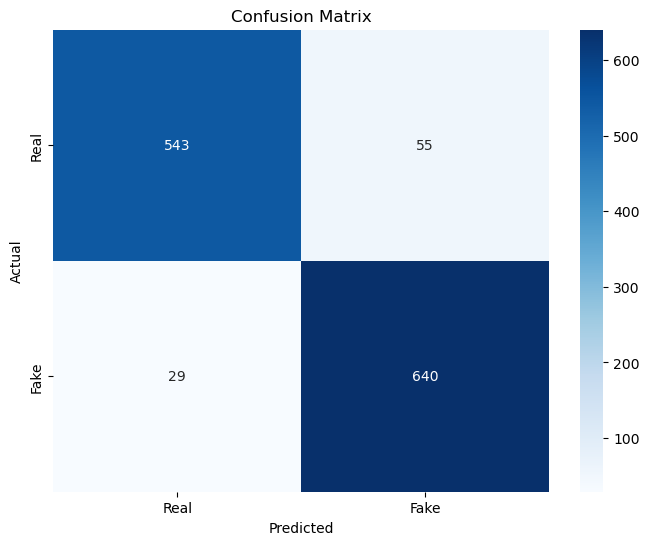

In [17]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
